In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from econml.dml import DML, LinearDML, SparseLinearDML, CausalForestDML

import numpy as np
from itertools import product
from sklearn.linear_model import (Lasso, MultiTaskElasticNetCV)
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import json
class NumpyEncoder(json.JSONEncoder):
    """自定义JSON编码器，用于处理numpy数据类型"""
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NumpyEncoder, self).default(obj)

In [3]:
num_datasets = 10
simulation_results_A = {n: [] for n in range(num_datasets)}

results = []


for n in range(num_datasets):
    # simulate_data = pd.read_csv('../data_A_2000/data_scenario_G_n_500_dataset_{}.csv'.format(n))
    simulate_data = pd.read_csv('../data_B3_2000/dataset_{}.csv'.format(n))

    X = simulate_data.drop(columns=['T', 'Y'])
    T = simulate_data['T']
    Y = simulate_data['Y']

    W = 2 * T - 1

    est3 = CausalForestDML(model_y=RandomForestRegressor(),
                       model_t=RandomForestClassifier(min_samples_leaf=10),
                       discrete_treatment=True,
                       n_estimators=1000,
                       min_impurity_decrease=0.001,
                       verbose=0,
                       cv=2)
    
    est3.tune(Y, T, X=X)
    est3.fit(Y, T, X=X)
    # te_pred3 = est3.effect(X_test)
    # lb3, ub3 = est3.effect_interval(X_test, alpha=0.01)
    ate = est3.ate__inference().point_estimate
    stderr = est3.ate__inference().stderr
    # zstat = est3.ate__inference().zstat
    # pvalue = est3.ate__inference().pvalue

    results.append([ate[0], stderr[0]])

    data = results

    data_str = json.dumps(data, cls=NumpyEncoder, indent=4)

    with open('../results/simu_B3_100_2000_dml2.json', 'w') as f:
        f.write(data_str)


'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' wa

In [4]:
import json
import numpy as np
with open('../results/simu_B3_100_2000_dml2.json', 'r') as f:
    data_str = f.read()

results = json.loads(data_str)
print(results)

kernel_ate_estimates = []
for model in results:
    kernel_ate_estimates.append(model[0])

mean = np.mean(kernel_ate_estimates)
variance = np.var(kernel_ate_estimates, ddof=1)


print(f"Mean: {mean}, Variance: {variance}")

[[13.408808121841057, 1.6464981554975848], [12.341353871984902, 1.7552677250543312], [10.565316586651896, 1.4531010950245988], [14.384429468768106, 1.3490087977481768], [16.089894480771854, 1.9395143560767663], [14.777056297462824, 1.6353132011818339], [12.336396367530808, 1.3726733327400111], [9.3630821069571, 1.510379331561608], [11.878745917883432, 1.3154263046145769], [11.175773113936211, 1.4939436082526958]]
Mean: 12.63208563337882, Variance: 4.227732249435042


In [5]:
##PLOT ATE
import matplotlib.pyplot as plt

def plot_ate(results):

    fig, axes = plt.subplots(1, 2,figsize=(8, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    i= 0

    # 过滤出当前kernel的所有模型
    i = i  
    kernel_ate_estimates = []
    for model in results:
        kernel_ate_estimates.append(model[0])

    # x_sticks = pi
    # x_values = [round(pi, 2) for pi in sorted(set(pi))]
    # print(x_values)
    # 绘制箱型图
    axes[i].boxplot(kernel_ate_estimates)
    # axes[i].axhline(y=-0.4, color='r', linestyle='--', label='True ATE (A)')
    axes[i].axhline(y=10, color='r', linestyle='--', label='True ATE (B)')
    axes[i].set_ylabel('ATE')
    axes[i].legend()

    i += 1

    i = i  
    kernel_ate_estimates = []
    for model in results:
        kernel_ate_estimates.append(model[1])
        
    # 绘制箱型图
    axes[i].boxplot(kernel_ate_estimates)
    axes[i].set_ylabel('STD')
    axes[i].legend()


    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


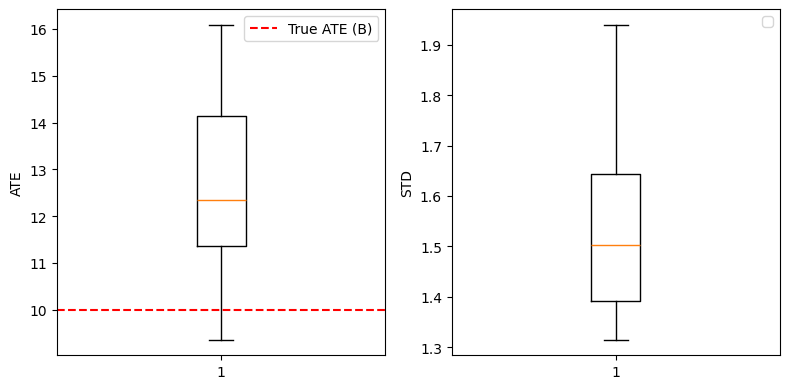

In [6]:
plot_ate(results)